In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'datalab.sqlite')
db_path

'/home/ronan/code/RonanB400/Project/decp_ml/data/datalab.sqlite'

In [3]:
conn = sqlite3.connect(db_path)
db = conn.cursor()
query = f"""
SELECT *
FROM "data.gouv.fr.2022.clean"
"""

data = pd.read_sql_query(query, conn)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299670 entries, 0 to 299669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   uid                        299670 non-null  object 
 1   id                         299670 non-null  object 
 2   nature                     299670 non-null  object 
 3   acheteur_id                299670 non-null  object 
 4   acheteur_nom               299477 non-null  object 
 5   acheteur_siren             299500 non-null  object 
 6   titulaire_id               299670 non-null  object 
 7   titulaire_typeIdentifiant  299670 non-null  object 
 8   titulaire_nom              292097 non-null  object 
 9   titulaire_siren            298537 non-null  object 
 10  objet                      299670 non-null  object 
 11  montant                    299670 non-null  float64
 12  codeCPV                    299670 non-null  object 
 13  procedure                  29

In [4]:
montants_df = data['montant'].dropna()
montants_df.describe()

count    2.996700e+05
mean     1.040053e+10
std      1.017208e+12
min      1.000000e-02
25%      6.999966e+04
50%      1.583553e+05
75%      4.690646e+05
max      1.000000e+14
Name: montant, dtype: float64

Text(0.5, 1.0, 'Distribution des montants des commandes')

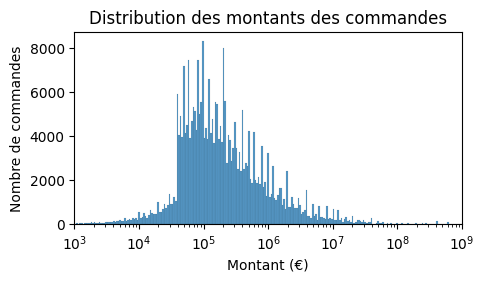

In [5]:
fig, ax = plt.subplots(figsize=(5, 2.5))
sns.histplot( montants_df,log_scale=True, ax=ax)
ax.set_xscale('log')
ax.set_xlim(10**3,10**9)
ax.set_xlabel('Montant (€)')
ax.set_ylabel('Nombre de commandes')
ax.set_title('Distribution des montants des commandes')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299670 entries, 0 to 299669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   uid                        299670 non-null  object 
 1   id                         299670 non-null  object 
 2   nature                     299670 non-null  object 
 3   acheteur_id                299670 non-null  object 
 4   acheteur_nom               299477 non-null  object 
 5   acheteur_siren             299500 non-null  object 
 6   titulaire_id               299670 non-null  object 
 7   titulaire_typeIdentifiant  299670 non-null  object 
 8   titulaire_nom              292097 non-null  object 
 9   titulaire_siren            298537 non-null  object 
 10  objet                      299670 non-null  object 
 11  montant                    299670 non-null  float64
 12  codeCPV                    299670 non-null  object 
 13  procedure                  29

In [7]:
data['formePrix'].value_counts()

formePrix
Forfaitaire    109095
Unitaire       107397
Mixte           83178
Name: count, dtype: int64

In [8]:
data[data['codeCPV'] == '45000000-7'][['objet']]

,objet
78,TRAVAUX RENOVATION PARTIELLE EHPAD
86,GPE SCO-LOT2-TRAVAUX RENOVATION ENERGETIQUE
203,LANDERNEAU - Construction 2nd collège - lot 0...
221,Lot 6 Etanchéité
251,202501 PRL02 - LOT 07 DOUBLAGE CLOISONS PLAFONDS
...,...
299444,MENUISERIES BOIS
299453,EXTENSION RENOVATION DES URGENCES GHI MONTFERMEIL
299527,2023/30 - Lot1 Gros-oeuvre/charpente-Construc...
299547,MARCHE DE TRAVAUX A BONS DE COMMANDE - LOT 7 CVC


In [9]:
data['formePrix'].value_counts()

formePrix
Forfaitaire    109095
Unitaire       107397
Mixte           83178
Name: count, dtype: int64

In [10]:
data['ccag'].value_counts()

ccag
Fournitures courantes et services                     92540
Travaux                                               92382
Pas de CCAG                                           84251
Prestations intellectuelles                           16225
Maitrise d'œuvre                                      10225
Techniques de l'information et de la communication     3930
Marchés industriels                                     117
Name: count, dtype: int64

In [11]:
years = data['datePublicationDonnees'].str[:4]
years.value_counts()

datePublicationDonnees
2024    168021
2025     62205
2023     37431
2022     18354
2021     10055
2020      2948
2019       592
2018        20
2003        10
2026         4
2002         4
2017         4
2004         3
2016         3
2044         3
2028         2
2006         1
1941         1
2027         1
2007         1
2033         1
1899         1
1920         1
2029         1
0204         1
Name: count, dtype: int64